<a href="https://colab.research.google.com/github/RishabhMehra/Machine-Learning-with-Python-/blob/Data/Adv_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Developing Gradient descent Algorith for Linear regression


In [ ]:
url ='https://raw.githubusercontent.com/RishabhMehra/Machine-Learning-with-Python-/main/Data/Advertising.csv'

df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = df[['TV','Radio','Newspaper']]
Y = df['Sales']





In [ ]:
# Standardize X and Y

Y = np.array((Y -Y.mean()) / Y.std())
X = X.apply(lambda rec: (rec-rec.mean())/rec.std(),axis=0)


In [ ]:
#Step 1
#randomly Initialize bias and weights
import random
def initialize(dim):
  np.random.seed(seed=42)
  random.seed(42)
  b = random.random()
  w = np.random.rand(dim)

  return b,w


In [ ]:
#step 2
#Predict values from bias and weights

def Predict_y(b,w,X) :
  return b + X.dot(w)



In [ ]:
#Step3
#Calculate cost function - MSE mean square error

import math
def get_cost(Y,Y_hat):
  Y_resid = Y-Y_hat
  return np.sum(np.matmul(Y_resid.T,Y_resid)/len(Y_resid))

In [ ]:
#code test

b,w = initialize(3)


Y_hat = Predict_y(b,w,X)
get_cost(Y,Y_hat)

1.5303100198505888

In [ ]:
#step 4 
#update bias and weights

def update_beta(x,y,y_hat,b_0,w_0, Learning_rate):
  db = (np.sum(y_hat -y)*2) / len(y)
  dw = (np.dot((y_hat -y),x)) * 2 / len(y)
  b_1 = b_0 - Learning_rate * db
  w_1 = w_0 - Learning_rate * dw
  return b_1,w_1

In [ ]:
#code test
b,w = initialize(3)
print("After Initialization - Bias :",b," Weights :",w)
Y_hat = Predict_y(b,w,X)
b,w  = update_beta(X,Y,Y_hat,b,w,0.01)
print("After first update - Bias :",b," Weights :",w)

After Initialization - Bias : 0.6394267984578837  Weights : [0.37454012 0.95071431 0.73199394]
After first update - Bias : 0.6266382624887261  Weights : [0.38079093 0.9376953  0.71484883]


# Finding optimal bias and weights

1. Run a fixed number of iterations and use the bias and weights as optimal values at the end these iterations.
2. Run iterations until the change in cost is small, that is  less than a predefined value

In [ ]:
def run_gradient_descent(X,
                         Y,
                         alpha = 0.01,
                         num_iterations =100):
  b,w = initialize(X.shape[1])

  iter_num =0
  gd_iterations_df = pd.DataFrame(columns= ['iteration','cost'])
  result_idx = 0

  for each_iter in range(num_iterations):
    Y_hat = Predict_y(b,w,X)
    this_cost = get_cost(Y,Y_hat)
    prev_b = b
    prev_w = w
    b,w = update_beta(X,Y,Y_hat,prev_b,prev_w,alpha)

    if(iter_num %10 == 0):
      gd_iterations_df.loc[result_idx] = [iter_num,this_cost]
      result_idx = result_idx + 1
    
    iter_num +=1
  print("Final estimate of b and w:",b,w)

  return gd_iterations_df, b,w

In [ ]:
gd_iterration_df,b,w  = run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final estimate of b and w: 0.4284489581739148 [0.48270238 0.75265969 0.46109174]


In [ ]:
gd_iterration_df[10:20]

,iteration,cost
10,100.0,1.000444
11,110.0,0.960059
12,120.0,0.921545
13,130.0,0.884812
14,140.0,0.849776
15,150.0,0.816356
16,160.0,0.784476
17,170.0,0.754063
18,180.0,0.725048
19,190.0,0.697364


In [ ]:
#Plotting the cost Function 

import seaborn as sn


Text(0, 0.5, 'Cost or MSE')

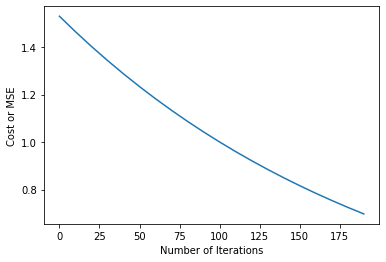

In [ ]:
plt.plot( gd_iterration_df['iteration'],gd_iterration_df['cost'])
plt.xlabel("Number of Iterations")
plt.ylabel("Cost or MSE")

In [ ]:
print("Final estimate of b and w:",b,w)

Final estimate of b and w: 0.4284489581739148 [0.48270238 0.75265969 0.46109174]


In [ ]:
#increease cost to 0.01
alpha_df_1,b,w  = run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)

Final estimate of b and w: 2.7765471421782624e-16 [ 0.75306591  0.53648155 -0.00433069]


In [ ]:
# cost to 0.001
alpha_df_2,b,w  = run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)

Final estimate of b and w: 0.011664695556930515 [0.74315125 0.52779959 0.01171703]


Text(0.5, 1.0, 'Cost vs Iterations for different alpha values')

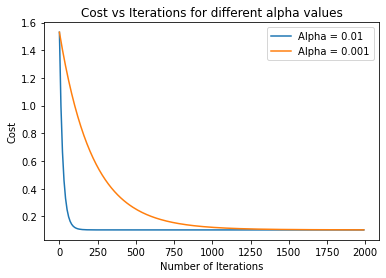

In [ ]:
plt.plot( alpha_df_1['iteration'],alpha_df_1['cost'],label ="Alpha = 0.01")
plt.plot( alpha_df_2['iteration'],alpha_df_2['cost'],label ="Alpha = 0.001")

plt.legend()
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.title('Cost vs Iterations for different alpha values')